In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1','NOy1','NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'WSy1', 'ATy1','PM2.5y2', 'PM1y2','NOy2','NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'WSy2', 'ATy2','PM2.5y3', 'PM1y3','NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'WSy3', 'ATy3','year', 'month', 'day']]
Y1 = df['NO']

In [149]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=8)

In [152]:
grad_boost = GradientBoostingRegressor(n_estimators=2500,
                                      max_depth=12,
                                      max_features='log2',
                                      min_samples_split=7,
                                      min_samples_leaf=6,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=12, max_features='log2',
                          min_samples_leaf=6, min_samples_split=7,
                          n_estimators=2500)

In [153]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9997694943920524

Score on test data: 0.5853233852417193

Root Mean Squared Error: 44.663045639025036

Overall model accuracy: 0.5853233852417193


In [154]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1','NOy1','NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'WSy1', 'ATy1','PM2.5y2', 'PM1y2','NOy2','NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'WSy2', 'ATy2','PM2.5y3', 'PM1y3','NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'WSy3', 'ATy3','year', 'month', 'day']]

X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,WSy1,ATy1,PM2.5y2,...,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,WSy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,19.845714,0.645714,8.394286,217.428571,...,100.627143,83.730000,212.015714,56.007143,31.830000,1.072857,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,18.558571,0.671429,8.800000,264.292857,...,98.832857,67.225714,194.864286,57.234286,25.420000,0.885714,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,21.981429,0.888571,11.971429,191.864286,...,101.944286,57.842857,190.755714,48.108571,23.871429,0.792857,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,22.795714,0.818571,9.905714,237.660000,...,94.412857,75.028571,195.770000,43.388571,28.211429,0.822857,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,18.811429,0.965714,10.632857,173.172857,...,49.015714,68.434286,127.910000,44.487143,26.552857,0.955714,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,22.227143,1.020000,9.834286,143.550000,...,74.012857,62.091429,156.391429,42.347143,26.207143,1.098571,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,18.641429,1.088571,11.920000,193.068571,...,153.021429,66.960000,268.622857,39.584286,25.985714,1.011429,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,18.934286,0.791429,13.324286,109.957143,...,50.672857,67.874286,129.678571,30.340000,27.005714,1.112857,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,7.574286,1.167143,15.858571,166.732857,...,34.234286,82.401429,120.168571,37.265714,26.588571,1.247143,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,7.415000,0.940000,12.517143,109.975714,...,38.925714,62.438571,108.778571,26.370000,26.894286,1.481429,17.097143,2020,3,1


In [155]:
predict=grad_boost.predict(X)

In [156]:
predict

array([102.07430606,  90.13655527,  71.29075183,  72.05370328,
        61.65521826,  55.13255581,  46.18275374,  49.53942662,
        61.89012259,  70.60307115,  58.16690002,  61.98098685,
        49.29841075,  54.6559749 ,  62.16014092,  38.6330131 ,
        45.64935324,  55.81328974,  35.01406779,  55.3641979 ,
        40.92115183,  42.39414465,  45.72235589,  17.69783173,
        16.20886533,  18.19901597,  20.03768433,  13.17197613,
        20.66463091,  11.73875824,  11.76620092,  19.97731628,
        18.36237289,  23.28535992,  15.69116618,  16.21453355,
        10.52363027,  12.72963536,  16.73442422,  55.56656389,
        62.0084447 ,  66.39596239,  73.32441685,  78.28671172,
        73.88238508,  67.30842938, 101.94172187,  66.71536947,
        67.53923321, 119.5067788 , 102.07488626,  68.68366701,
        70.86123586])

In [157]:
dates=data.loc['207':'259','From Date']

In [158]:
X['From Date']=dates.values

In [159]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'WSy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'WSy2', 'ATy2', 'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3',
       'SO2y3', 'WSy3', 'ATy3', 'year', 'month', 'day', 'From Date'],
      dtype='object')

In [160]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [161]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [162]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [163]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

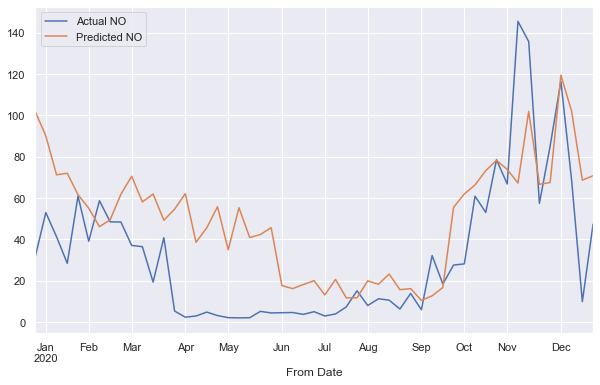

In [164]:
test['NO'].plot(legend=True, label='Actual NO', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO')

In [165]:
np.sqrt(mean_squared_error(test['NO'],X['pred']))

30.92804236947657

In [166]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 26.10850533571395
MSE: 1994.7876457536331
RMSE: 44.663045639025036
R-Squared: 0.5853233852417193


In [167]:
mae = metrics.mean_absolute_error(test['NO'],X['pred'])
mse = metrics.mean_squared_error(test['NO'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 24.213986739835054
MSE: 956.5438048081379
RMSE: 30.92804236947657
R-Squared: 0.16951342050768448


In [168]:
import pickle
filename = 'NO_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [169]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.5853233852417193


# 3rd plot

In [170]:
testcase = pd.DataFrame()

In [171]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [172]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [173]:
testcase

,test,pred,Corrected
163,68.825714,81.099963,36.436917
160,47.905714,70.370410,25.707365
149,108.850000,126.517162,81.854117
117,38.562857,63.150562,18.487516
200,30.632857,113.098646,68.435600
88,11.204286,18.796594,-25.866452
23,6.577143,14.339753,-30.323292
131,10.748571,13.559419,-31.103627
130,21.225714,8.451500,53.114546
139,13.411429,16.305607,-28.357439


In [174]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [175]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.6329614686690033

In [176]:
test2020=pd.DataFrame()

In [177]:
test2020['test']=test['NO']
test2020['pred']=X['pred']

In [178]:
test2020.index=test.index

In [179]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

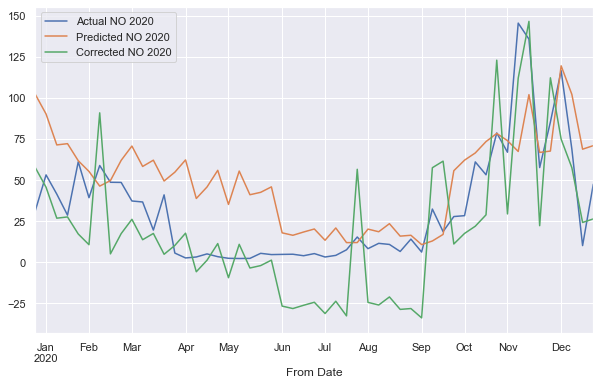

In [180]:
test2020['test'].plot(legend=True, label='Actual NO 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO 2020')

In [181]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5543072607052403